# MNIST data training
- For this assignment I plan on using:
     - Random Forrest
     - K-nearest neighbor

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn as skl, sklearn.datasets as skds

%matplotlib inline


In [2]:
# fetch the dataset from https://www.openml.org/
mnist = skds.fetch_openml('mnist_784', as_frame=False, parser='auto')

# the returned if of type sklearn.utils.Bunch
# this is a dictionary whose keys can also be accessed as attributes
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [4]:
# description of dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

# Create dataframe from the original dataset
- This will assist us with:
    1. Viewing the data and its attributes
    2. Efficiently clean the data


In [5]:
X = pd.DataFrame(data=mnist.data)
y = pd.DataFrame(data=mnist.target)

# Examine the data
- View some of the attributes of the data

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y.head()

,0
0,5
1,0
2,4
3,1
4,9


In [8]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64

# What we found:
1. There are 0 value columns in every instance
1. Labels are integers in the range 0-9 inclusive
# What we can do:
1. Train model on subset of attributes that have atleast 1 non-zero value throughout all instances
1. Train classification as all instances are digits
# Operation
1. Remove columns whose max is there min


In [10]:
dropped_columns = []
for column in X.columns:
    if X[column].max() == X[column].min():
        dropped_columns.append(column)
X.drop(dropped_columns, axis=1, inplace=True)
print('Dropped columns:', len(dropped_columns))
print('New shape of training dataset:', X.shape)

Dropped columns: 65
New shape of training dataset: (70000, 719)


# Confirm that there are no faulty values in dataset

In [11]:
for column in X.columns:
    if X[column].isnull().any():
        print('Null value detected in feature: ', column)

# Hooray! No nulls detected

# Normalize the data

In [12]:
min_X = {}
max_X = {}
for column in X.columns:
    min_X[column] = X[column].min()
    max_X[column] = X[column].max()
    X[column] = (X[column] - X[column].min())/(X[column].max() - X[column].min())
X = X.values

In [13]:
X = pd.DataFrame(X)

In [14]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,709,710,711,712,713,714,715,716,717,718
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
del mnist

In [16]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,709,710,711,712,713,714,715,716,717,718
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.000016,0.000026,0.000014,0.000014,0.000014,0.000028,0.000048,0.000091,0.000170,0.000245,...,0.002625,0.002312,0.001879,0.001308,0.000777,0.000392,0.000184,0.000066,0.000051,0.000028
std,0.003794,0.004961,0.003780,0.003780,0.003780,0.004903,0.005605,0.007990,0.011573,0.012764,...,0.044066,0.041184,0.037055,0.031066,0.023587,0.016757,0.011003,0.006173,0.006117,0.005176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Learn Models
- Random Forrest classifier
- K-nearest neighbor
# Random Forrest Classifier
- Hyperparameters:
    1. Node Size
    1. Number of Nodes
    1. Number of features sampled

In [17]:
from sklearn.model_selection import train_test_split
# X_train = X[:60000]
# X_test = X[60000:70000]
# y_train = y[:60000]
# y_test = y[60000:70000]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1428)

In [18]:
X_train.shape

(60004, 719)

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
clf.fit(X_test, y_test)

/var/folders/q0/46rg_8k54v9fz0gpl1y4k0yh0000gn/T/ipykernel_84279/2789652163.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_test, y_test)


RandomForestClassifier()

# Test random forrest 

In [21]:
clf.score(X_test, y_test)

1.0

In [22]:
y_pred = clf.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='all'))

In [24]:
print(cm)

         0         1        2         3         4         5         6  \
0  0.10004  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
1  0.00000  0.108944  0.00000  0.000000  0.000000  0.000000  0.000000   
2  0.00000  0.000000  0.10014  0.000000  0.000000  0.000000  0.000000   
3  0.00000  0.000000  0.00000  0.106443  0.000000  0.000000  0.000000   
4  0.00000  0.000000  0.00000  0.000000  0.098039  0.000000  0.000000   
5  0.00000  0.000000  0.00000  0.000000  0.000000  0.091937  0.000000   
6  0.00000  0.000000  0.00000  0.000000  0.000000  0.000000  0.097739   
7  0.00000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
8  0.00000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
9  0.00000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   

         7         8        9  
0  0.00000  0.000000  0.00000  
1  0.00000  0.000000  0.00000  
2  0.00000  0.000000  0.00000  
3  0.00000  0.000000  0.00000  
4  0.00000  0.000000  0.00000  
5  0

<Axes: >

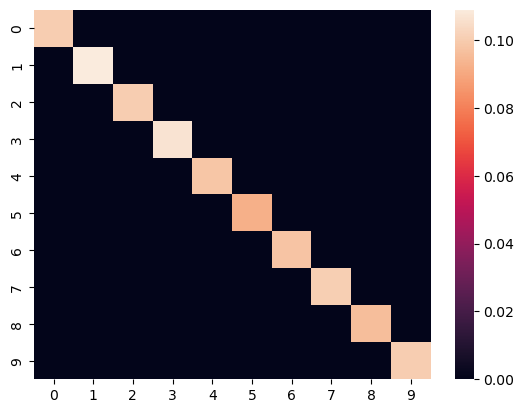

In [25]:
import seaborn as sns
sns.heatmap(cm)

# Hyperparameter tuning for Random Forrest Classifier
- Gridsearch to find the best hyper parameters for random forrest classifier
1. Node Size
1. Number of Nodes
1. Number of features sampled

In [26]:
search_space = {
    'n_estimators': [10,50,100,250],
    'max_depth': [5,10,20],
    'class_weight': [None, {0:1, 1:5}, {0:1, 1:10}, {0:1, 1:25}]
}

In [27]:
from sklearn.model_selection import GridSearchCV
grid_svc = GridSearchCV(clf, param_grid=search_space)

In [29]:
grid_svc.fit(X_train, y_train)

/Users/noahcampise/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/noahcampise/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 

# K nearest neighbor 
- Hyperparameters:
    1. K

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

/Users/noahcampise/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.score(X_test, y_test)

0.9739895958383353

In [ ]:
y_pred = neigh.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='all'))

<Axes: >

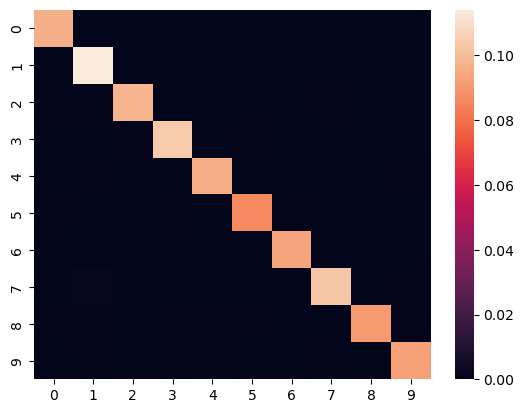

In [ ]:
sns.heatmap(cm)

# K nearest neighbors all day baby

In [ ]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}